### Задание 1

Выберите один верный ответ. “Коэффициент корреляции между количеством сна и уровнем счастья равен нулю” - это (1) нулевая гипотеза

* 1) Нулевая гипотеза
* 2) Альтернативная гипотеза

__Ответ__ 

_1) нулевая гипотеза_

### Задание 2

Выберите один верный ответ. Если уровень значимости 0.10, а p-значение равно 0.7, то необходимо (2) не отвергать нулевую гипотезу

* 1)отвергнуть нулевую гипотезу
* 2)не отвергать нулевую гипотезу

__Ответ__

2) не отвергать нулевую гипотезу

### Задание 3

Выберите все подходящие ответы. Что из перечисленного является 
статистической гипотезой?

* 1)  Случайная величина X имеет 
     нормальное распределение
* 2)  Среднее арифметическое 
     признака A равно 52.5
* 3)  Средний вес упаковки яблок составляет 1300 г.
* 4)  Дисперсия случайной величины X 
     не больше 5
     
__Ответ__

   1)  Случайная величина X имеет нормальное распределение
   
   2)  Среднее арифметическое признака A равно 52.5
   
   3)  Средний вес упаковки яблок составляет 1300 г.
   
   4)  Дисперсия случайной величины X не больше 5

### Задание 4

Парфюмерная компания хочет узнать возраст женщин, которые являются их покупательницами. Ранее уже было изучено, что средний возраст  был 37, а среднеквадратичное отклонение равно 3.4. Размер выборки - 200 человек. Рассчитайте 95% доверительный интервал для среднего возраста. Представьте все необходимые вычисления.

# Формула доверительного интервала

Когда мы проводили вычисления, мы пользовались этой формулой:

   $$\mu = \bar{X} \pm z_{\frac{\alpha }{2}}\times\frac{\sigma }{\sqrt{n}}$$
   
ИЛИ

   $$\mu = \bar{X} \pm t_{\frac{\alpha }{2}}\times\frac{\sigma }{\sqrt{n}}$$

Так как я не могу из задания узнать дано истенное sigma или нет то выбираю распределение Стьюдента

In [324]:
from scipy.stats import t
import math

# создадим функцию расчета интервала на основе распределения Стьюдента

def interval_t(alpha, s, n, mean):
    value = t.ppf(alpha / 2, n - 1) * s / math.sqrt(n)
    return mean - abs(value), mean + abs(value)

# расчитаем доверительный интервал согласно заданным условиям

interval_t(0.05, 3.4, 200, 37)

(36.525909492821064, 37.474090507178936)

__Ответ__

95% интервал для среднего возраста покупательниц находится в диапозоне от 36.52 до 37.47 

### Задание 5

Перед Вами данные результатов экзаменов для детей средней школы.

In [325]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth

df=pd.read_csv('examscore.csv')

In [326]:
df

,gender,race,parenteducation,lunch,testprepcourse,mathscore,readingscore,writingscore
0,female,group A,some high school,standard,completed,78,83,85
1,female,group C,some high school,standard,none,69,71,78
2,female,group B,bachelor's degree,free/reduced,completed,58,65,71
3,female,group C,some college,standard,none,69,72,70
4,female,group C,high school,standard,none,67,72,67
...,...,...,...,...,...,...,...,...
995,male,group A,some college,standard,none,68,60,55
996,male,group C,associate's degree,free/reduced,none,76,70,66
997,male,group B,some high school,standard,completed,50,43,44
998,male,group D,some college,free/reduced,none,34,28,22


Обработайте данные на предмет пропусков и проверьте гипотезу о том, что между средними оценками по математике для мальчиков и девочек нет статистических различий. Представьте все необходимые вычисления и содержательную интерпретацию.

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender             1000 non-null object
race               1000 non-null object
parenteducation    1000 non-null object
lunch              1000 non-null object
testprepcourse     1000 non-null object
mathscore          1000 non-null int64
readingscore       1000 non-null int64
writingscore       1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [328]:
# просмотрим столбцы 'gender', 'race', 'parenteducation', 'lunch', 'testprepcourse' на некорреетные значения 

for column in ['gender', 'race', 'parenteducation', 'lunch', 'testprepcourse']:
    print(df[column].value_counts())
    print(df[column].value_counts().sum())
    print()

male      515
female    485
Name: gender, dtype: int64
1000

group C    337
group D    228
group B    218
group E    138
group A     79
Name: race, dtype: int64
1000

some college          228
high school           218
some high school      202
associate's degree    183
bachelor's degree     105
master's degree        64
Name: parenteducation, dtype: int64
1000

standard        653
free/reduced    347
Name: lunch, dtype: int64
1000

none         653
completed    347
Name: testprepcourse, dtype: int64
1000



In [329]:
# просмотрим столбцы 'mathscore', 'readingscore', 'writingscore' на некорреетные значения 

df.describe()

,mathscore,readingscore,writingscore
count,1000.000000,1000.000000,1000.000000
mean,65.745000,68.587000,67.154000
std,16.906679,15.400897,16.029948
min,-77.000000,-99.000000,-99.000000
25%,55.000000,59.000000,58.000000
50%,66.000000,69.000000,67.000000
75%,77.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000


In [330]:
# некорректные значения есть во всех трех столбцах 'mathscore', 'readingscore', 'writingscore' просмотрим 
# их количество и значения

for column in ['mathscore', 'readingscore', 'writingscore']:
    print(df[df[column] < 0].describe())
    print()

       mathscore  readingscore  writingscore
count        2.0      2.000000      2.000000
mean       -77.0     69.000000     69.500000
std          0.0      4.242641      0.707107
min        -77.0     66.000000     69.000000
25%        -77.0     67.500000     69.250000
50%        -77.0     69.000000     69.500000
75%        -77.0     70.500000     69.750000
max        -77.0     72.000000     70.000000

       mathscore  readingscore  writingscore
count        1.0           1.0           1.0
mean        68.0         -99.0          60.0
std          NaN           NaN           NaN
min         68.0         -99.0          60.0
25%         68.0         -99.0          60.0
50%         68.0         -99.0          60.0
75%         68.0         -99.0          60.0
max         68.0         -99.0          60.0

       mathscore  readingscore  writingscore
count        1.0           1.0           1.0
mean        77.0          74.0         -99.0
std          NaN           NaN           NaN
min     

__Вывод__

  1. Пропуски в столбцах 'gender', 'race', 'parenteducation', 'lunch', 'testprepcourse' отсутсвуют 
  2. В столбцах 'mathscore', 'readingscore', 'writingscore' есть аномально низкие данные. Скоре всеого это опечетка и надо изменить знак на положительный.
  

In [331]:
df.loc[df.mathscore < 0, 'mathscore'] = df.loc[df.mathscore < 0, 'mathscore'] * (-1)

In [332]:
df.loc[df.readingscore == -99, 'readingscore'] = df.loc[df.readingscore == -99, 'readingscore'] * (-1)

In [333]:
df.loc[df.writingscore == -99, 'writingscore'] = df.loc[df.writingscore == -99, 'writingscore'] * (-1)

In [334]:
df.describe()

,mathscore,readingscore,writingscore
count,1000.000000,1000.000000,1000.000000
mean,66.053000,68.785000,67.352000
std,15.658908,14.490022,15.175651
min,17.000000,18.000000,18.000000
25%,55.000000,59.000000,58.000000
50%,66.000000,69.000000,67.000000
75%,77.000000,79.000000,78.000000
max,100.000000,100.000000,100.000000


In [335]:
# посмотрим на рспределение числовых оценок и на выбросы данных
def diagram_bar(data, column):
    fig = plt.figure()
    main_axes = fig.add_axes([0,0,1,1])
    data[column].hist(bins = 50)
    insert_axes = fig.add_axes([1.1,0,0.5,1])
    data.boxplot(column = column)

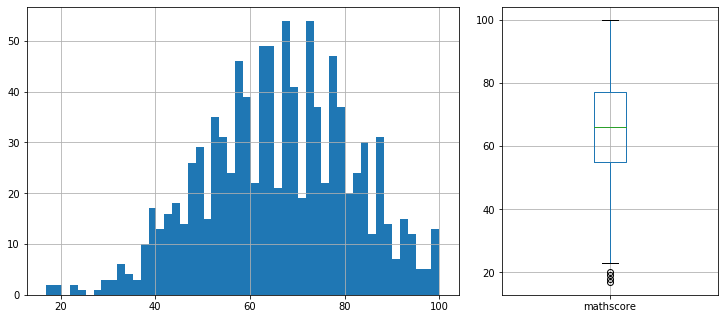

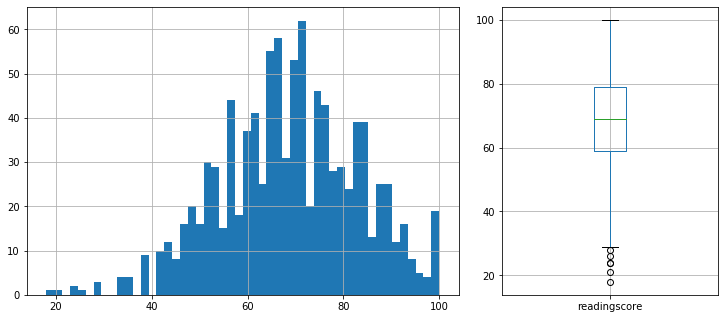

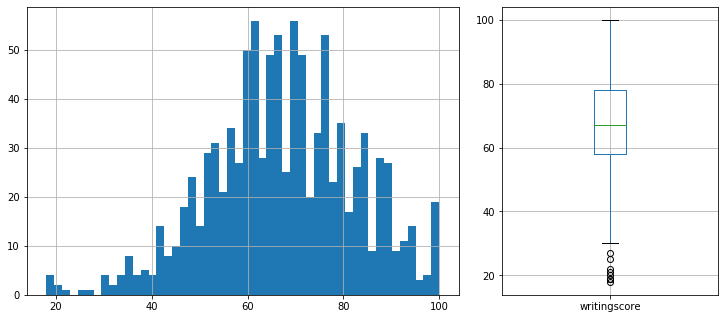

In [336]:
for column in ['mathscore', 'readingscore', 'writingscore']:
    diagram_bar(df, column)

__Вывод__
   1. Распределение оценок по 3 дисциплинам похоже на нормальное.
   2. По всем трем столбцам существуют выбросы по нижним пределам.
   
Таким образом, для анализа гипотезы равенства средних оценок по математике будем использовать данные без выбросов

In [337]:
# расчитаем межквартильный размах и отберем значения без выбросов

IQR = df['mathscore'].quantile(0.75) - df['mathscore'].quantile(0.25)

df_test = df[df['mathscore'] >= (df['mathscore'].quantile(0.25) - 1.5 * IQR)].copy()

При определении соотвествия средней оценки по математике между девочками и мальчиками:
   - H0 - средняя оценка по математике среди мальчиков и девочек совпадает
   - Н1 - средняя оценка по математике среди мальчиков и девочек не сопадает
   - Пороговое значение alpha 5%

In [338]:
alpha = 0.05

if (st.ttest_ind(df_test[df_test['gender'] == 'female'].mathscore, df_test[df_test['gender'] == 'male'].mathscore).pvalue < alpha):
    print("Отвергаем нулевую гипотезу")

else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


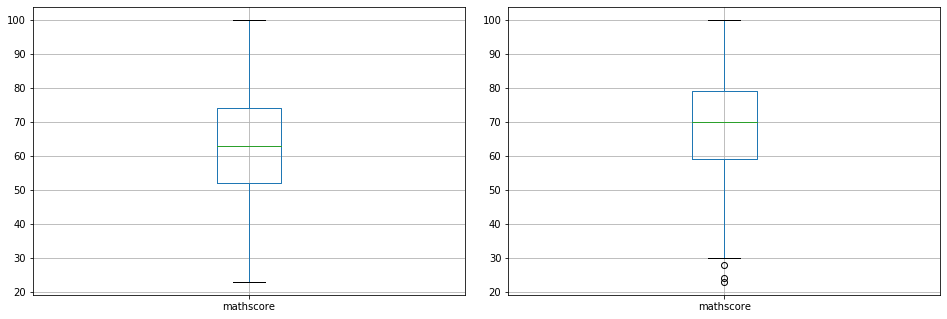

In [339]:
fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
df_test[df_test['gender'] == 'female'].boxplot(column = 'mathscore')
insert_axes = fig.add_axes([1.1,0,1,1])
df_test[df_test['gender'] == 'male'].boxplot(column = 'mathscore')

__Вывод:__
   1) таким образом можно сказать, что мальчики и девочки в среднем математику сдают по разнному;
   2) мальчики в среднем сдают на более высокие оценки, чем девочки.

### Задание 6

Вам предложены данные A/B теста. Проанализируйте, есть ли статистически значимая разница для конверсии в контрольной и экспериментальной группе.

Данные содержат 5 признаков:
    
* user_id - ID пользователя
* timestamp - Временная отметка
* group - К какой группе относится пользователь (контрольная или экспериментальная)
* landing_page - Какой дизайн показали пользователю {old_page, new_page}
* converted - Конверсия (0=not converted, 1=converted)

Не забудьте проверить и подготовить данные, сделать всю необходимую предобработку.

In [340]:
dfab = pd.read_csv('ab_data.csv')

dfab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [341]:
dfab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [342]:
dfab.duplicated().sum()

0

In [343]:
# проверим разделение пользователей на группы
list_error = []

for row in dfab.index:
    if dfab.loc[row, 'group'] == 'control' and dfab.loc[row, 'landing_page'] == 'old_page':
        continue 
    elif dfab.loc[row, 'group'] == 'treatment' and dfab.loc[row, 'landing_page'] == 'new_page':
        continue
    else:
        list_error.append(row)

In [344]:
len(list_error)

3893

In [345]:
# удалим ошибочные данные из таблицы

dfab = dfab.drop(list_error)

In [346]:
# переведм данные столбца timestamp в формат datetime и выделим дату

dfab['timestamp'] = pd.to_datetime(dfab['timestamp'])
dfab['date'] = pd.to_datetime(dfab['timestamp']).dt.date
dfab['date'] = pd.to_datetime(dfab['date'], format='%Y-%m-%d')

In [347]:
dfab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 6 columns):
user_id         290585 non-null int64
timestamp       290585 non-null datetime64[ns]
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
date            290585 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 15.5+ MB


In [348]:
# просмотрим период времени проведения A/B теста

dfab['date'].describe()

count                  290585
unique                     23
top       2017-01-08 00:00:00
freq                    13387
first     2017-01-02 00:00:00
last      2017-01-24 00:00:00
Name: date, dtype: object

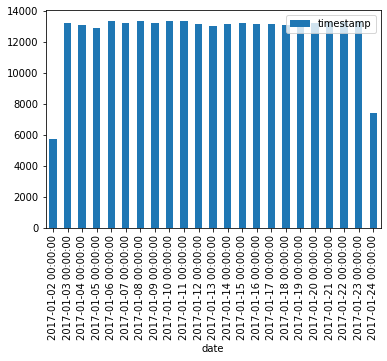

In [349]:
# Просмотрим распределение событий в разрезе дней

date = dfab.groupby('date').agg({'timestamp': 'count'}).reset_index()
date = date.sort_values(by = 'date')
date.plot(x='date', y='timestamp', kind='bar')
plt.show()

In [350]:
dfab['timestamp'].describe()

count                         290585
unique                        290585
top       2017-01-06 05:19:03.372027
freq                               1
first     2017-01-02 13:42:05.378582
last      2017-01-24 13:41:54.460509
Name: timestamp, dtype: object

__Выводы__

  - стоит обратить внимание на первый и последний день скорее всего такие данные связаны с тем, что показы шли не полные сутки

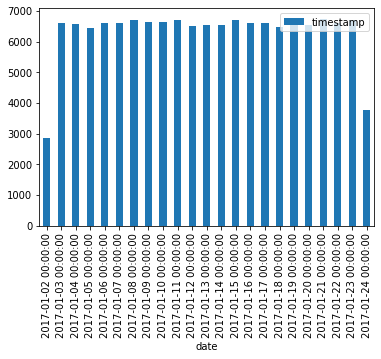

In [351]:
# просмотрим данные в разрезе групп 

data_control = dfab[dfab['group'] == 'control'].groupby('date').agg({'timestamp': 'count'}).reset_index()
data_control = data_control.sort_values(by = 'date')

data_control.plot(x='date', y='timestamp', kind='bar')
plt.show()

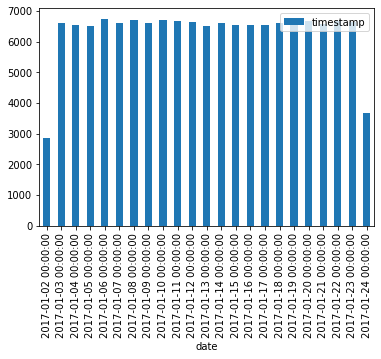

In [352]:
data_treatment = dfab[dfab['group'] == 'treatment'].groupby('date').agg({'timestamp': 'count'}).reset_index()
data_treatment = data_treatment.sort_values(by = 'date')

data_treatment.plot(x='date', y='timestamp', kind='bar')
plt.show()

__Вывод__
   - удалим из таблицы данные с первой и последней датой

In [353]:
dfab = dfab[(dfab['date'] > dfab['date'].describe()['first']) & (dfab['date'] < dfab['date'].describe()['last'])]

In [354]:
dfab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277438 entries, 0 to 294477
Data columns (total 6 columns):
user_id         277438 non-null int64
timestamp       277438 non-null datetime64[ns]
group           277438 non-null object
landing_page    277438 non-null object
converted       277438 non-null int64
date            277438 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 14.8+ MB


In [355]:
1- 294478/277438

-0.06141912787721937

__Вывод__

   - в итоге в ходе преобразования сократили данные на 6.1%

In [356]:
# просмотрим распределение данных по уникальным пользователем в разрезе групп
# определим на сколько они различны по количеству

expid = dfab.groupby('group').agg({'user_id': 'nunique'}).reset_index()
treatment_count = expid.loc[expid.group == 'treatment', 'user_id'][1]
expid['share'] = expid['user_id'] / treatment_count
expid

,group,user_id,share
0,control,138661,0.999171
1,treatment,138776,1.000000


In [357]:
# проверим на наличие одинаковых пользователей в обеех группах

users_control = dfab[dfab['group'] == 'control'].groupby('user_id').agg({'timestamp': 'count'}).reset_index()
users_treatment = dfab[dfab['group'] == 'treatment'].groupby('user_id').agg({'timestamp': 'count'}).reset_index()

users_control['replay'] = users_control['user_id'].where(users_control['user_id'].isin(users_treatment['user_id']), 'norm')

users_control[users_control['replay'] != 'norm']

,user_id,timestamp,replay


__Вывод__
   1. Количество пользователей в различных группах различается не более, чем на 1%.
   2. Для всех групп фиксируют и отправляют в системы аналитики данные об одном и том же.
   3. Попавший в одну из групп посетитель остаётся в этой группе до конца теста.

In [358]:
# Функция по равенству долей

def stat_ch(group_1, group_2, data, alfa):
    df1 = data[data['group'] == group_1]
    df2 = data[data['group'] == group_2]
    user_all_1 = df1['user_id'].nunique()
    user_all_2 = df2['user_id'].nunique()
    for row in data['converted'].unique():
        users_1 = df1[df1['converted'] == row]['user_id'].nunique()
        users_2 = df2[df2['converted'] == row]['user_id'].nunique()
        successes = np.array([users_1, users_2])
        trials = np.array([user_all_1, user_all_2])
        p1 = successes[0]/trials[0]
        p2 = successes[1]/trials[1]
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
        difference = p1 - p2
        z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
        distr = st.norm(0, 1)
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('Доли по логу',  row, 'групп', group_1, 'и', group_2, 'различаются')
        print('H0 - доли', row, 'групп', group_1, 'и', group_2, 'одинаковые')
        print('Н1 - доли', row, 'групп', group_1, 'и', group_2, 'различаются')
        print('p-значение: ', p_value)
        if (p_value < alpha):
            print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
        else:
            print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
        print()

In [359]:
stat_ch('control', 'treatment', dfab, 0.05)

Доли по логу 0 групп control и treatment различаются
H0 - доли 0 групп control и treatment одинаковые
Н1 - доли 0 групп control и treatment различаются
p-значение:  0.1845129233966052
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными

Доли по логу 1 групп control и treatment различаются
H0 - доли 1 групп control и treatment одинаковые
Н1 - доли 1 групп control и treatment различаются
p-значение:  0.1845129233966314
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



__Вывод__ 
   - группы control и treatment не имеют отличий.